In [111]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_curve

In [112]:
df = pd.read_csv(r"C:\MasterThesis\v1.0\sEEG_dataset.csv")
print(df.shape)
df = df.dropna()
print(df.shape)
labels = df['labels']
df = df.drop(df.columns[-1], axis=1)
X = df
y = labels

(180, 4501)
(180, 4501)


In [113]:
sm = SMOTE(random_state=0)
X, y = sm.fit_resample(X, y)

In [114]:
# normalizacja danych
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
model = SVC(kernel='linear')

# trenowanie modelu
model.fit(X_train, y_train)

# przewidywanie na danych testowych
predictions = model.predict(X_test)

# sprawdzanie dokładności modelu
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy: {accuracy*100}%")

Accuracy: 73.80952380952381%


Text(0.5, 1.0, 'CONFUSION MATRIX')

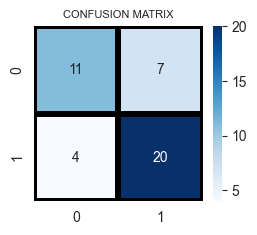

In [117]:
#Confusion matrix
plt.figure(figsize=(6,5))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,cmap="Blues",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=8)

[0.         0.38888889 1.        ]
[0.         0.83333333 1.        ]


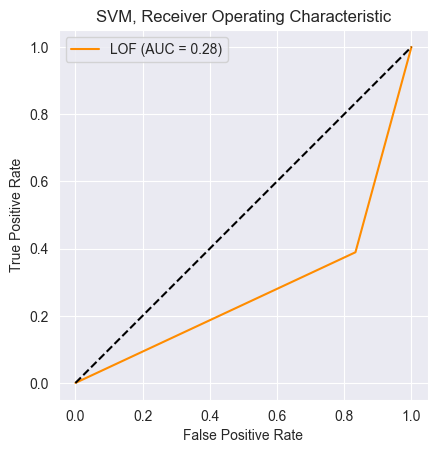

In [118]:
### plot ROC curve
# model.fit(X)
# y_pred = model.negative_outlier_factor_
#
fpr, tpr, thresholds = roc_curve(y_test, predictions)
print(fpr)
print(tpr)
RocCurveDisplay.from_predictions(
    y_test, predictions,
    name="LOF",
    color="darkorange",
    pos_label=0
)
plt.plot([0, 1], [0, 1], "k--")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM, Receiver Operating Characteristic")
plt.legend()
plt.show()